In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [8]:
def find_histogram(clt):
    """
    create a histogram with k clusters
    :param: clt
    :return:hist
    """
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    hist = hist.astype("float")
    hist /= hist.sum()
    return hist

In [9]:
def filter_neutral_colors(colorCodes):
    neutral_colors=np.array([[0,0,0],[255,255,255],[128,128,128]])
    colors = [c for c in colorCodes if c not in neutral_colors]
    return colorCodes

In [10]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [11]:
def plot_colors2(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        print(RGB2HEX(color))
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

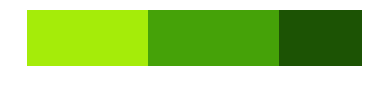

In [13]:
img = cv2.imread("2.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = img.reshape((img.shape[0] * img.shape[1],3)) #represent as row*column,channel number
clt = KMeans(n_clusters=5) #cluster number
clt.fit(img)

cluster_centers = filter_neutral_colors(clt.cluster_centers_)

hist = find_histogram(clt)
bar = plot_colors2(hist, cluster_centers)

plt.axis("off")
plt.imshow(bar)
plt.show()